% ADAP-ML Report


# Statistics

T-test


3.8.8


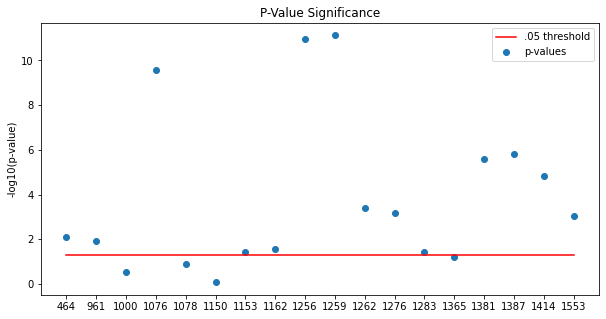

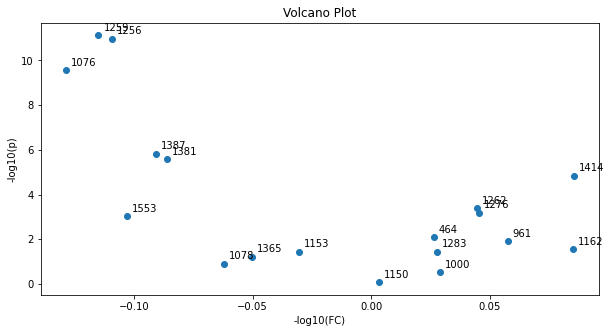

In [1]:
from platform import python_version

print(python_version())

import modules.adapml_data as adapml_data
import modules.adapml_classification as adapml_classification
import modules.adapml_clustering as adapml_clustering
import modules.adapml_chemometrics as adapml_chemometrics
import modules.adapml_statistics as adapml_statistics
import modules.adapml_regression as adapml_regression
import numpy as np
import modules.loadTestData as load_data
import sklearn.preprocessing as pre
from sklearn.cross_decomposition import PLSRegression as PLS
from matplotlib import pyplot as plt
from sklearn import cluster as clst
from scipy.cluster.hierarchy import dendrogram

import os

reldir = os.getcwd()
path_to_data = os.path.join(reldir, '..', 'data', 'SCLC_study_output_filtered_2.csv')

data = adapml_data.DataImport(path_to_data)

response1D = data.resp
#response1D = adapml_data.DataImport.getResponse(path_to_data)
response2D = adapml_data.DataImport.getDummyResponse(response1D)

variables = data.getVariableNames()
samples = data.getSampleNames()

t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
t_test.plot_logp_values(variables)
t_test.plot_volcano_t(variables)




# Dimension-Reduction

Dimension-reduction methods are used to condense high dimensional data down to dimensions which provide the most information. We have implemented the principal component analysis (PCA). It performs a change of basis and the new basis is chosen, such that the i-th principal component is orthogonal to the first i-1 principal components and the direction maximizes the variance of the projected data.
We use the Python library sklearn for both PCA and LDA.

LDA


PCA Projections
Projections of data into latent space.
Data is colored by response


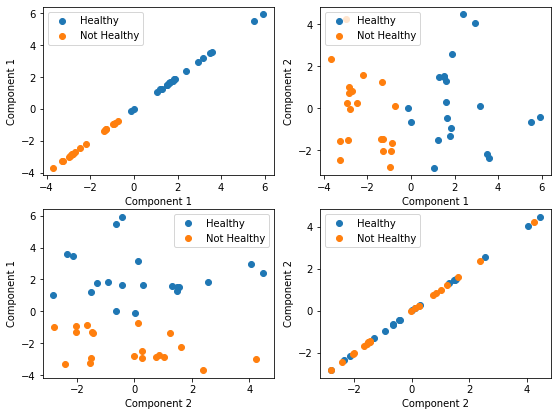

LDA Projections
Projections of data into latent space.
Data is colored by response


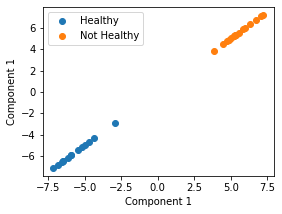

PCA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


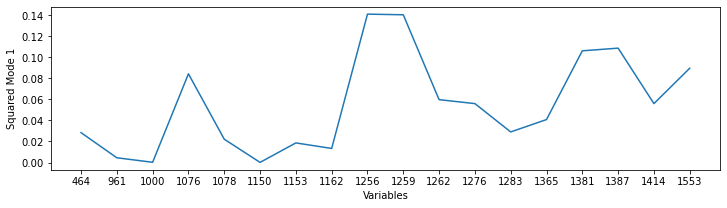

LDA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


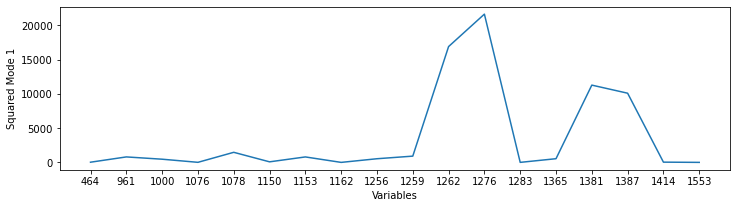

In [2]:
data.normalizeData("autoscale")

pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D) # Also Predicts

print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("LDA Projections");lda.plotProjectionScatterMultiClass(1, labels=["Healthy", "Not Healthy"])

print("PCA Vectors"); pca.plotVectorLoadings(variables, 1)
print("LDA Vectors"); lda.plotVectorLoadings(variables, 1)


# Clustering

K-means, hierarchical,



          Cluster 1       Cluster 2        Cluster 3
0     NSCLC_H1437_1    NSCLC_H522_1     NSCLC_A549_1
1     NSCLC_H2228_1    NSCLC_H522_2    NSCLC_H1703_2
2     NSCLC_H2228_2     SCLC_86M1_2    NSCLC_H1703_1
3     NSCLC_H1437_2     SCLC_86M1_1     NSCLC_A549_2
4     NSCLC_H3122_1     SCLC_16HV_1     NSCLC_H322_1
5      NSCLC_H322_2     SCLC_16HV_2     NSCLC_H358_2
6     NSCLC_H3122_2    SCLC_DMS79_1     NSCLC_H358_1
7   NSCLC_HCC4006_1    SCLC_DMS79_2      NSCLC_PC9_1
8               NaN     SCLC_H187_2      NSCLC_PC9_2
9               NaN     SCLC_H187_1  NSCLC_HCC4006_2
10              NaN     SCLC_H209_1              NaN
11              NaN     SCLC_H524_1              NaN
12              NaN     SCLC_H209_2              NaN
13              NaN     SCLC_H524_2              NaN
14              NaN      SCLC_H69_1              NaN
15              NaN      SCLC_H82_1              NaN
16              NaN      SCLC_H82_2              NaN
17              NaN      SCLC_H69_2           

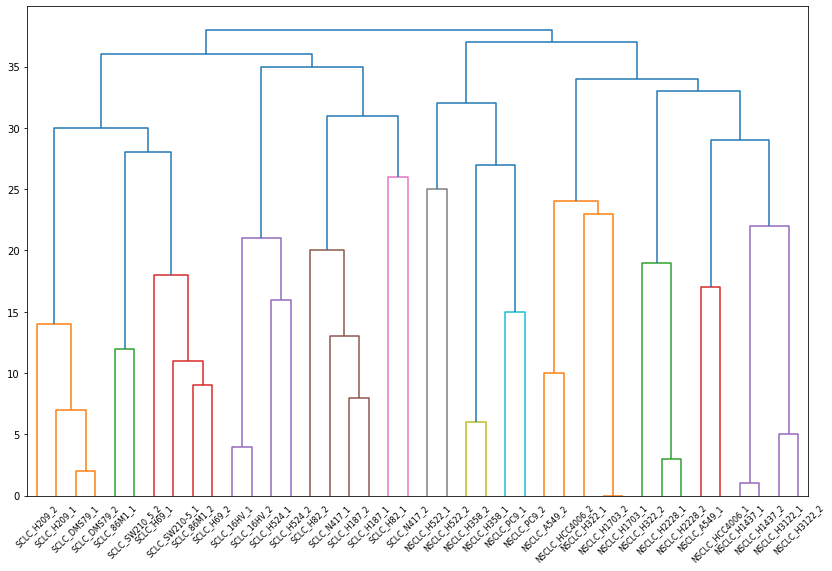

In [3]:
kmeans_cluster = adapml_clustering.Clustering(data.data, 'kmeans', 3)
kmeans_cluster.getClusterResults(samples)

hierarchical_cluster = adapml_clustering.Clustering(data.data, 'hierarchical', 3)
hierarchical_cluster.getClusterResults(samples)
hierarchical_cluster.plot_dendrogram(samples)




# Classification

PLS-DA, SVM, random forests, logstic regression



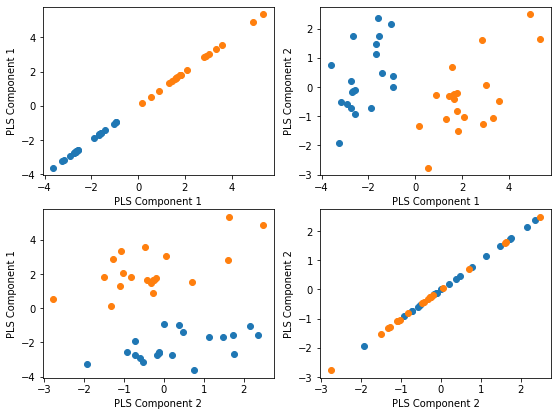

SVM Validated Parameters:  {'kernel': 'linear', 'shrinking': True}


Random Forest Validated Parameters:  {'criterion': 'gini', 'n_estimators': 50}
SVM: R^2=1.0 Q^2=1.0
RF: R^2=1.0 Q^2=1.0
Accuracy: 1.0


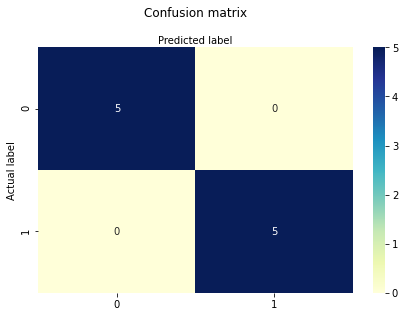

In [4]:
def plotProjectionScatterMultiClass(pc, resp, num_var):
    plt.figure(figsize=(24, 18))

    for i in range(num_var):
        for j in range(num_var):
            plt.subplot(5,5,5*(i) + j + 1)
            for c in range(resp.shape[1]):
                inx = np.where(resp[:,c] == 1)[0]
                tmp = pc[inx,:]
                pc1 = tmp[:,i]
                pc2 = tmp[:,j]
                plt.scatter(pc1, pc2)
            plt.xlabel("PLS Component "+str(i+1))
            plt.ylabel("PLS Component "+str(j+1))

    plt.show()

data = load_data.loadDataPandas(path_to_data)
d = data.to_numpy()
var_index = data.columns.values.tolist()

resp = load_data.getResponseMatrix2D()

norm_trans = pre.StandardScaler().fit(d)
data_norm = norm_trans.transform(d)
#data_norm, norm_trans = pre.mean_center(d)
#In-built preprocessing method - TBD

pls = PLS().fit(data_norm, resp)
pls_trans = pls.transform(data_norm)

plotProjectionScatterMultiClass(pls_trans, resp, 2)


data = adapml_data.DataImport(path_to_data)
svm = adapml_classification.Classification(data.data, response1D, 'svm', .75, kfolds=3)
rnf = adapml_classification.Classification(data.data, response1D, 'randomforest', .75, kfolds=3)


adapml_classification.print_model_stats(svm, "SVM")
adapml_classification.print_model_stats(rnf, "RF")

logistic = adapml_classification.Classification(data.data, response1D, 'logistic', .25)
print(logistic)


# Regression

Linear regression



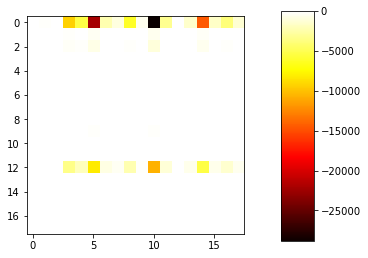

In [5]:
reg = adapml_regression.Regression(data.data, "linear")
reg.linear
